In [ ]:
TEST_FILE_DIR = "../../test_data/unit_tests/input_table_formats"
OUTDIR = f"{TEST_FILE_DIR}/outdir"

SPECTRONAUT_FILE = f"{TEST_FILE_DIR}/spectronaut.frgions.large.tsv"

FILE_DEFAULT = "default_out.tsv"
FILE_DASK_PROC = "dask_proc_out.tsv"



In [ ]:

import os
import pandas as pd
import shutil
import alphabase.quantification.quant_reader.config_dict_loader as config_dict_loader
import alphabase.quantification.quant_reader.longformat_reader as longformat_reader



def test_table_loadings(input_file, outdir, file_default, file_dask_proc):
    if not os.path.exists(outdir):
        os.mkdir(outdir)
        #os.chdir(outdir)

    input_type, config_dict_for_type, sep = config_dict_loader.get_input_type_and_config_dict(input_file)

    longformat_reader.reformat_and_write_longtable_according_to_config(input_file,outfile_name=file_default,config_dict_for_type=config_dict_for_type, chunksize=10_000, use_alphaquant_format=True)

    longformat_reader.reformat_and_write_longtable_according_to_config(input_file,outfile_name=file_dask_proc,config_dict_for_type=config_dict_for_type, enforce_largefile_processing=True, chunksize=10_000, use_alphaquant_format=True)


    df_default = pd.read_csv(file_default, sep = "\t")
    df_dask_proc = pd.read_csv(file_dask_proc, sep = "\t")
    display(df_default)
    display(df_dask_proc)


    df_dask_proc = df_dask_proc[df_default.columns]

    assert df_default.equals(df_dask_proc)
    
    assert set(df_default["quant_id"]) == set(df_dask_proc["quant_id"])

    os.remove(file_default)
    os.remove(file_dask_proc)
    shutil.rmtree(outdir)


test_table_loadings(SPECTRONAUT_FILE, OUTDIR, FILE_DEFAULT, FILE_DASK_PROC)


,protein,quant_id,20210603_EXPL1_MCT_SA_species_100ng_100_1_02.raw,20210603_EXPL1_MCT_SA_species_100ng_100_1_03.raw,20210603_EXPL1_MCT_SA_species_100ng_100_1_08.raw,20210603_EXPL1_MCT_SA_species_100ng_1_1_06.raw,20210603_EXPL1_MCT_SA_species_100ng_1_1_07.raw
0,A5Z2X5,SEQ_LTGNPELSSLDEVLAK_MOD__LTGNPELSSLDEVLAK__CH...,0.000000,0.000000,0.00000,1.617023e+04,1.602696e+04
1,A5Z2X5,SEQ_LTGNPELSSLDEVLAK_MOD__LTGNPELSSLDEVLAK__CH...,0.000000,0.000000,0.00000,1.096225e+04,8.629451e+03
2,A5Z2X5,SEQ_LTGNPELSSLDEVLAK_MOD__LTGNPELSSLDEVLAK__CH...,0.000000,0.000000,0.00000,1.952972e+04,1.864307e+04
3,A5Z2X5,SEQ_LTGNPELSSLDEVLAK_MOD__LTGNPELSSLDEVLAK__CH...,0.000000,0.000000,0.00000,4.527895e+04,4.218998e+04
4,A5Z2X5,SEQ_LTGNPELSSLDEVLAK_MOD__LTGNPELSSLDEVLAK__CH...,0.000000,0.000000,0.00000,1.306302e+04,1.211871e+04
...,...,...,...,...,...,...,...
3745,P00942,SEQ_WVILGHSER_MOD__WVILGHSER__CHARGE_3_FRGION_...,363.793976,785.749023,1060.96228,2.095927e+05,1.822027e+05
3746,P00942,SEQ_WVILGHSER_MOD__WVILGHSER__CHARGE_3_MS1ISOT...,298242.100000,193629.900000,670615.50000,1.143471e+08,1.177732e+08
3747,P00942,SEQ_WVILGHSER_MOD__WVILGHSER__CHARGE_3_MS1ISOT...,405057.300000,86032.400000,219763.30000,6.600330e+07,6.807766e+07
3748,P00942,SEQ_WVILGHSER_MOD__WVILGHSER__CHARGE_3_MS1ISOT...,0.000000,121827.600000,159573.10000,1.863090e+07,1.829165e+07


,protein,quant_id,20210603_EXPL1_MCT_SA_species_100ng_100_1_02.raw,20210603_EXPL1_MCT_SA_species_100ng_100_1_03.raw,20210603_EXPL1_MCT_SA_species_100ng_100_1_08.raw,20210603_EXPL1_MCT_SA_species_100ng_1_1_06.raw,20210603_EXPL1_MCT_SA_species_100ng_1_1_07.raw
0,A5Z2X5,SEQ_LTGNPELSSLDEVLAK_MOD__LTGNPELSSLDEVLAK__CH...,0.000000,0.000000,0.00000,1.617023e+04,1.602696e+04
1,A5Z2X5,SEQ_LTGNPELSSLDEVLAK_MOD__LTGNPELSSLDEVLAK__CH...,0.000000,0.000000,0.00000,1.096225e+04,8.629451e+03
2,A5Z2X5,SEQ_LTGNPELSSLDEVLAK_MOD__LTGNPELSSLDEVLAK__CH...,0.000000,0.000000,0.00000,1.952972e+04,1.864307e+04
3,A5Z2X5,SEQ_LTGNPELSSLDEVLAK_MOD__LTGNPELSSLDEVLAK__CH...,0.000000,0.000000,0.00000,4.527895e+04,4.218998e+04
4,A5Z2X5,SEQ_LTGNPELSSLDEVLAK_MOD__LTGNPELSSLDEVLAK__CH...,0.000000,0.000000,0.00000,1.306302e+04,1.211871e+04
...,...,...,...,...,...,...,...
3745,P00942,SEQ_WVILGHSER_MOD__WVILGHSER__CHARGE_3_FRGION_...,363.793976,785.749023,1060.96228,2.095927e+05,1.822027e+05
3746,P00942,SEQ_WVILGHSER_MOD__WVILGHSER__CHARGE_3_MS1ISOT...,298242.100000,193629.900000,670615.50000,1.143471e+08,1.177732e+08
3747,P00942,SEQ_WVILGHSER_MOD__WVILGHSER__CHARGE_3_MS1ISOT...,405057.300000,86032.400000,219763.30000,6.600330e+07,6.807766e+07
3748,P00942,SEQ_WVILGHSER_MOD__WVILGHSER__CHARGE_3_MS1ISOT...,0.000000,121827.600000,159573.10000,1.863090e+07,1.829165e+07


In [ ]:
%reload_ext autoreload
%autoreload 2
import alphabase.quantification.quant_reader.quant_reader_manager as quant_reader_manager
import os
import shutil

INPUT_FILES = [os.path.join(TEST_FILE_DIR, x ) for x in ["diann.tsv", "spectronaut.tsv", "spectronaut_frgion.tsv", "mq_peptides.txt", "diann_test_input_mDIA.tsv", "fragpipe.tsv"]]


def perform_table_loading(input_file):
    """only makes sure that the commands run without error"""
    
    #import the input table once the input and the results folder are specified. 
    # The function automatically recognizes the format (Currently MQ, Spectronaut, DIA-NN configured)
    input_data = quant_reader_manager.import_data(input_file)
    display(input_data)
    

for idx in range(len(INPUT_FILES)):
    perform_table_loading(INPUT_FILES[idx])
    print('loading ran through')




using input type diann_fragion_isotopes


,protein,quant_id,FRGION,MOD,CHARGE,MS1ISOTOPES,SEQ,20210407_tims03_Evo03_PaSk_SA_HeLa_100ng_Yeast_100ng_S2-A10_1_24557,20210407_tims03_Evo03_PaSk_SA_HeLa_100ng_Yeast_100ng_S2-A11_1_24560,20210407_tims03_Evo03_PaSk_SA_HeLa_100ng_Yeast_100ng_S2-A12_1_24563,...,20210407_tims03_Evo03_PaSk_SA_HeLa_200ng_Yeast_2ng_S2-C12_1_24565,20210407_tims03_Evo03_PaSk_SA_HeLa_200ng_Yeast_2ng_S2-C1_1_24532,20210407_tims03_Evo03_PaSk_SA_HeLa_200ng_Yeast_2ng_S2-C2_1_24535,20210407_tims03_Evo03_PaSk_SA_HeLa_200ng_Yeast_2ng_S2-C3_1_24538,20210407_tims03_Evo03_PaSk_SA_HeLa_200ng_Yeast_2ng_S2-C4_1_24541,20210407_tims03_Evo03_PaSk_SA_HeLa_200ng_Yeast_2ng_S2-C5_1_24544,20210407_tims03_Evo03_PaSk_SA_HeLa_200ng_Yeast_2ng_S2-C6_1_24547,20210407_tims03_Evo03_PaSk_SA_HeLa_200ng_Yeast_2ng_S2-C7_1_24550,20210407_tims03_Evo03_PaSk_SA_HeLa_200ng_Yeast_2ng_S2-C8_1_24553,20210407_tims03_Evo03_PaSk_SA_HeLa_200ng_Yeast_2ng_S2-C9_1_24556
0,O95551,SEQ_AAAEEGHIIPR_MOD_AAAEEGHIIPR_CHARGE_2_FRGION_0,FRGION_0,MOD_AAAEEGHIIPR,CHARGE_2,NaN,SEQ_AAAEEGHIIPR,0.0,896.367,584.1060,...,2896.280,714.800,2985.020,3675.020,1933.8600,2910.93,3961.440,1963.560,2534.710,1927.910
1,O95551,SEQ_AAAEEGHIIPR_MOD_AAAEEGHIIPR_CHARGE_2_FRGION_1,FRGION_1,MOD_AAAEEGHIIPR,CHARGE_2,NaN,SEQ_AAAEEGHIIPR,0.0,1179.120,1303.0100,...,879.823,3659.020,2903.790,4837.040,1679.5400,2781.31,1194.830,1009.480,617.338,2126.020
2,O95551,SEQ_AAAEEGHIIPR_MOD_AAAEEGHIIPR_CHARGE_2_FRGION_2,FRGION_2,MOD_AAAEEGHIIPR,CHARGE_2,NaN,SEQ_AAAEEGHIIPR,0.0,596.609,465.8550,...,2853.020,1595.010,1424.990,2152.950,2022.5200,2384.02,2195.020,2385.020,2146.020,2022.020
3,O95551,SEQ_AAAEEGHIIPR_MOD_AAAEEGHIIPR_CHARGE_2_FRGION_3,FRGION_3,MOD_AAAEEGHIIPR,CHARGE_2,NaN,SEQ_AAAEEGHIIPR,0.0,1702.010,58.7502,...,1056.070,154.148,1038.430,787.176,1142.1400,3036.32,414.958,2242.020,414.917,644.922
4,O95551,SEQ_AAAEEGHIIPR_MOD_AAAEEGHIIPR_CHARGE_2_FRGION_4,FRGION_4,MOD_AAAEEGHIIPR,CHARGE_2,NaN,SEQ_AAAEEGHIIPR,0.0,722.131,0.0000,...,582.225,407.820,356.076,499.796,2117.0200,1057.96,2270.020,870.767,915.039,588.258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,Q9NXG2,SEQ_AAPAQQTTQPGGGK_MOD_AAPAQQTTQPGGGK_CHARGE_2...,FRGION_0,MOD_AAPAQQTTQPGGGK,CHARGE_2,NaN,SEQ_AAPAQQTTQPGGGK,0.0,0.000,0.0000,...,0.000,0.000,0.000,0.000,20447.1000,0.00,0.000,0.000,0.000,0.000
122,Q9NXG2,SEQ_AAPAQQTTQPGGGK_MOD_AAPAQQTTQPGGGK_CHARGE_2...,FRGION_3,MOD_AAPAQQTTQPGGGK,CHARGE_2,NaN,SEQ_AAPAQQTTQPGGGK,0.0,0.000,0.0000,...,0.000,0.000,0.000,0.000,454.1350,0.00,0.000,0.000,0.000,0.000
123,Q9NXG2,SEQ_AAPAQQTTQPGGGK_MOD_AAPAQQTTQPGGGK_CHARGE_2...,FRGION_4,MOD_AAPAQQTTQPGGGK,CHARGE_2,NaN,SEQ_AAPAQQTTQPGGGK,0.0,0.000,0.0000,...,0.000,0.000,0.000,0.000,310.9380,0.00,0.000,0.000,0.000,0.000
124,Q9NXG2,SEQ_AAPAQQTTQPGGGK_MOD_AAPAQQTTQPGGGK_CHARGE_2...,FRGION_5,MOD_AAPAQQTTQPGGGK,CHARGE_2,NaN,SEQ_AAPAQQTTQPGGGK,0.0,0.000,0.0000,...,0.000,0.000,0.000,0.000,43.2633,0.00,0.000,0.000,0.000,0.000


loading ran through
using input type spectronaut_precursor_v2


,protein,quant_id,MOD,SEQ,CHARGE,E_D170331_S209-S-1-240min_MHRM_R01_T0.htrms
0,A0PJW6,SEQ_AGGQQVTLTTHAPFGLGAHFTVPLK_MOD__AGGQQVTLTTH...,MOD__AGGQQVTLTTHAPFGLGAHFTVPLK_,SEQ_AGGQQVTLTTHAPFGLGAHFTVPLK,CHARGE_4,7760.914062
1,A0PJW6,SEQ_DVLLFEHDR_MOD__DVLLFEHDR__CHARGE_3,MOD__DVLLFEHDR_,SEQ_DVLLFEHDR,CHARGE_3,19934.281250
2,A0PJW6,SEQ_GEVPAMLPLK_MOD__GEVPAMLPLK__CHARGE_2,MOD__GEVPAMLPLK_,SEQ_GEVPAMLPLK,CHARGE_2,111439.398438
3,A0PJW6,SEQ_LFDNTVGAYR_MOD__LFDNTVGAYR__CHARGE_2,MOD__LFDNTVGAYR_,SEQ_LFDNTVGAYR,CHARGE_2,152354.437500
4,A3KMH1;A3KMH1-3,SEQ_DGLIVYEDSPLVK_MOD__DGLIVYEDSPLVK__CHARGE_2,MOD__DGLIVYEDSPLVK_,SEQ_DGLIVYEDSPLVK,CHARGE_2,34521.593750
...,...,...,...,...,...,...
189,H2KYI5;Q86NI2,SEQ_KFPQLILDLATDLK_MOD__KFPQLILDLATDLK__CHARGE_3,MOD__KFPQLILDLATDLK_,SEQ_KFPQLILDLATDLK,CHARGE_3,5939.184570
190,H2KZF8;O44466,SEQ_HDVDPHLLGVFLPR_MOD__HDVDPHLLGVFLPR__CHARGE_3,MOD__HDVDPHLLGVFLPR_,SEQ_HDVDPHLLGVFLPR,CHARGE_3,24022.138672
191,K8ESE2;O45391,SEQ_AFLSALK_MOD__AFLSALK__CHARGE_2,MOD__AFLSALK_,SEQ_AFLSALK,CHARGE_2,75916.906250
192,K8ESE2;O45391,SEQ_MVWFESPSNPLLK_MOD__MVWFESPSNPLLK__CHARGE_2,MOD__MVWFESPSNPLLK_,SEQ_MVWFESPSNPLLK,CHARGE_2,27252.193359


loading ran through
using input type spectronaut_fragion_isotopes


,protein,quant_id,FRGION,MOD,CHARGE,MS1ISOTOPES,SEQ,E_D170331_S209-S-1-240min_MHRM_R01_T0.htrms
0,P00044,SEQ_DRNDLITYLK_MOD__DRNDLITYLK__CHARGE_3_FRGIO...,FRGION_b3_noloss_1,MOD__DRNDLITYLK_,CHARGE_3,NaN,SEQ_DRNDLITYLK,2821.802734
1,P00044,SEQ_DRNDLITYLK_MOD__DRNDLITYLK__CHARGE_3_FRGIO...,FRGION_b4_noloss_1,MOD__DRNDLITYLK_,CHARGE_3,NaN,SEQ_DRNDLITYLK,27549.345703
2,P00044,SEQ_DRNDLITYLK_MOD__DRNDLITYLK__CHARGE_3_FRGIO...,FRGION_b5_noloss_1,MOD__DRNDLITYLK_,CHARGE_3,NaN,SEQ_DRNDLITYLK,15359.532227
3,P00044,SEQ_DRNDLITYLK_MOD__DRNDLITYLK__CHARGE_3_FRGIO...,FRGION_y3_noloss_1,MOD__DRNDLITYLK_,CHARGE_3,NaN,SEQ_DRNDLITYLK,6005.712891
4,P00044,SEQ_DRNDLITYLK_MOD__DRNDLITYLK__CHARGE_3_FRGIO...,FRGION_y4_noloss_1,MOD__DRNDLITYLK_,CHARGE_3,NaN,SEQ_DRNDLITYLK,8474.114258
...,...,...,...,...,...,...,...,...
4105,P07172,SEQ_SFGLAGIR_MOD__SFGLAGIR__CHARGE_2_FRGION_y4...,FRGION_y4_noloss_1,MOD__SFGLAGIR_,CHARGE_2,NaN,SEQ_SFGLAGIR,39904.769531
4106,P07172,SEQ_SFGLAGIR_MOD__SFGLAGIR__CHARGE_2_FRGION_y6...,FRGION_y6_noloss_1,MOD__SFGLAGIR_,CHARGE_2,NaN,SEQ_SFGLAGIR,45823.726562
4107,P07172,SEQ_SFGLAGIR_MOD__SFGLAGIR__CHARGE_2_MS1ISOTOP...,NaN,MOD__SFGLAGIR_,CHARGE_2,MS1ISOTOPES_0,SEQ_SFGLAGIR,292103.000000
4108,P07172,SEQ_SFGLAGIR_MOD__SFGLAGIR__CHARGE_2_MS1ISOTOP...,NaN,MOD__SFGLAGIR_,CHARGE_2,MS1ISOTOPES_1,SEQ_SFGLAGIR,85024.100000


loading ran through
using input type maxquant_peptides_leading_razor_protein


,protein,quant_id,Shotgun_02-01_1,Shotgun_02-01_2,BoxCar_12-01_3,Shotgun_12-01_1,Shotgun_12-01_3,BoxCar_02-01_3,Shotgun_02-01_3,BoxCar_02-01_1,BoxCar_12-01_1,BoxCar_02-01_2,Shotgun_12-01_2,BoxCar_12-01_2
0,P37108,SEQ_AAAAAAAAAPAAAATAPTTAATTAATAAQ_MOD_2367.203,672810000,541180000,527370000,689370000,929610000,315090000,562880000,407110000,613190000,380630000,920600000,583740000
1,Q96JP5,SEQ_AAAAAAAAAVSR_MOD_999.54614,0,0,0,0,0,0,0,0,0,0,0,0
2,O75822,SEQ_AAAAAAAGDSDSWDADAFSVEDPVRK_MOD_2592.1728,86521000,26875000,27056000,110360000,130200000,42715000,32509000,81675000,120600000,30300000,32569000,31004000
3,P36578,SEQ_AAAAAAALQAK_MOD_955.54508,1722300000,1906400000,2114200000,2783900000,2236800000,1678900000,1805600000,1934800000,2124600000,1717300000,2169500000,1858400000
4,Q96P70,SEQ_AAAAAAGAASGLPGPVAQGLK_MOD_1747.9581,188490000,164960000,146210000,239140000,215870000,112760000,119320000,130520000,162770000,193850000,207500000,161190000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,P41214,SEQ_ADLPLLTSTFLGSHMFSCCPEGR_MOD_2595.192,0,0,19513000,0,26188000,18612000,7688700,0,0,0,0,0
990,P31142,SEQ_ADLPVEPVK_MOD_966.5386,231190000,181590000,33595000,38101000,33527000,147540000,172790000,230690000,34319000,140320000,36618000,39661000
991,Q9BTY7,SEQ_ADLQAAAVR_MOD_913.49813,75526000,138670000,83721000,160230000,0,0,123880000,121290000,141300000,116540000,182870000,174590000
992,P77338,SEQ_ADLQAQLDSLNK_MOD_1314.6779,0,0,0,0,0,0,0,0,0,0,0,0


loading ran through
using input type diann_fragion_isotopes_mDIA_raw


,protein,quant_id,FRGION,MOD,CHARGE,MS1ISOTOPES,SEQ,20220730_TIMS06_MCT_SA_HeLa_whi40_M07_Ref0s4s8_c2_AID8_01_S5-A6_1_3971_(Dimethyl-n-0),20220730_TIMS06_MCT_SA_HeLa_whi40_M07_Ref0s4s8_c2_AID8_01_S5-A6_1_3971_(Dimethyl-n-4),20220730_TIMS06_MCT_SA_HeLa_whi40_M07_Ref0s4s8_c2_AID8_01_S5-A6_1_3971_(Dimethyl-n-8),...,20220730_TIMS06_MCT_SA_HeLa_whi40_M07_Ref0s4s8_c2_AID8_02_S5-A7_1_3973_(Dimethyl-n-8),20220730_TIMS06_MCT_SA_HeLa_whi40_M07_Ref0s4s8_c2_AID8_03_S5-A8_1_3975_(Dimethyl-n-0),20220730_TIMS06_MCT_SA_HeLa_whi40_M07_Ref0s4s8_c2_AID8_03_S5-A8_1_3975_(Dimethyl-n-4),20220730_TIMS06_MCT_SA_HeLa_whi40_M07_Ref0s4s8_c2_AID8_03_S5-A8_1_3975_(Dimethyl-n-8),20220730_TIMS06_MCT_SA_HeLa_whi40_M07_Ref0s4s8_c2_AID8_04_S5-A9_1_3977_(Dimethyl-n-0),20220730_TIMS06_MCT_SA_HeLa_whi40_M07_Ref0s4s8_c2_AID8_04_S5-A9_1_3977_(Dimethyl-n-4),20220730_TIMS06_MCT_SA_HeLa_whi40_M07_Ref0s4s8_c2_AID8_04_S5-A9_1_3977_(Dimethyl-n-8),20220730_TIMS06_MCT_SA_HeLa_whi40_M07_Ref0s4s8_c2_AID8_05_S5-A10_1_3979_(Dimethyl-n-0),20220730_TIMS06_MCT_SA_HeLa_whi40_M07_Ref0s4s8_c2_AID8_05_S5-A10_1_3979_(Dimethyl-n-4),20220730_TIMS06_MCT_SA_HeLa_whi40_M07_Ref0s4s8_c2_AID8_05_S5-A10_1_3979_(Dimethyl-n-8)
0,O14497;O14497-2,SEQ_AAAGQESEGPAVGPPQPLGK_MOD_AAAGQESEGPAVGPPQP...,FRGION_0,MOD_(Dimethyl-n-0)AAAGQESEGPAVGPPQPLGK(Dimethy...,CHARGE_2,NaN,SEQ_AAAGQESEGPAVGPPQPLGK,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,48.001865,0.0,0.0,0.0,0.000000,0.0
1,O14497;O14497-2,SEQ_AAAGQESEGPAVGPPQPLGK_MOD_AAAGQESEGPAVGPPQP...,FRGION_1,MOD_(Dimethyl-n-4)AAAGQESEGPAVGPPQPLGK(Dimethy...,CHARGE_2,NaN,SEQ_AAAGQESEGPAVGPPQPLGK,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,74.003662,0.0
2,O14497;O14497-2,SEQ_AAAGQESEGPAVGPPQPLGK_MOD_AAAGQESEGPAVGPPQP...,FRGION_11,MOD_(Dimethyl-n-4)AAAGQESEGPAVGPPQPLGK(Dimethy...,CHARGE_2,NaN,SEQ_AAAGQESEGPAVGPPQPLGK,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
3,O14497;O14497-2,SEQ_AAAGQESEGPAVGPPQPLGK_MOD_AAAGQESEGPAVGPPQP...,FRGION_2,MOD_(Dimethyl-n-0)AAAGQESEGPAVGPPQPLGK(Dimethy...,CHARGE_2,NaN,SEQ_AAAGQESEGPAVGPPQPLGK,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,69.003723,0.0,0.0,0.0,0.000000,0.0
5,O14497;O14497-2,SEQ_AAAGQESEGPAVGPPQPLGK_MOD_AAAGQESEGPAVGPPQP...,FRGION_4,MOD_(Dimethyl-n-4)AAAGQESEGPAVGPPQPLGK(Dimethy...,CHARGE_2,NaN,SEQ_AAAGQESEGPAVGPPQPLGK,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,41.001869,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7737,Q9UNF1,SEQ_SYYETSK_MOD_SYYETSK_CHARGE_2_FRGION_4,FRGION_4,MOD_(Dimethyl-n-0)SYYETSK(Dimethyl-K-0),CHARGE_2,NaN,SEQ_SYYETSK,153.004273,0.0,0.0,...,0.0,0.0,0.0,0.0,423.009369,0.0,0.0,0.0,0.000000,0.0
7740,Q9UNF1,SEQ_SYYETSK_MOD_SYYETSK_CHARGE_2_FRGION_5,FRGION_5,MOD_(Dimethyl-n-0)SYYETSK(Dimethyl-K-0),CHARGE_2,NaN,SEQ_SYYETSK,2101.050781,0.0,0.0,...,0.0,0.0,0.0,0.0,1015.022888,0.0,0.0,0.0,0.000000,0.0
7743,Q9UNF1,SEQ_SYYETSK_MOD_SYYETSK_CHARGE_2_FRGION_6,FRGION_6,MOD_(Dimethyl-n-0)SYYETSK(Dimethyl-K-0),CHARGE_2,NaN,SEQ_SYYETSK,5193.111328,0.0,0.0,...,0.0,0.0,0.0,0.0,3041.087158,0.0,0.0,0.0,0.000000,0.0
7745,Q9UNF1,SEQ_SYYETSK_MOD_SYYETSK_CHARGE_2_FRGION_7,FRGION_7,MOD_(Dimethyl-n-0)SYYETSK(Dimethyl-K-0),CHARGE_2,NaN,SEQ_SYYETSK,931.029419,0.0,0.0,...,0.0,0.0,0.0,0.0,282.008423,0.0,0.0,0.0,0.000000,0.0


loading ran through
using input type fragpipe_precursors


,protein,quant_id,sample_2,sample_1,sample_3
0,sp|O94826|TOM70_HUMAN,SEQ_ADEMYDK_MOD_ADEMYDK,0.0,8525616.0,0.0
1,sp|Q9NUQ3|TXLNG_HUMAN,SEQ_ALLQMAEEK_MOD_ALLQMAEEK,29970788.0,1596635.5,30422000.0
2,sp|P26640|SYVC_HUMAN,SEQ_ALSPLEEWLR_MOD_ALSPLEEWLR,353638048.0,371597760.0,312282240.0
3,sp|P22087|FBRL_HUMAN,SEQ_ANCIDSTASAEAVFASEVK_MOD_ANC[57.0215]IDSTAS...,61226836.0,65094176.0,58320496.0
4,sp|P52758|RIDA_HUMAN,SEQ_APGAIGPYSQAVLVDR_MOD_APGAIGPYSQAVLVDR,45480616.0,0.0,35133800.0
...,...,...,...,...,...
109,sp|Q9Y4E8|UBP15_HUMAN,SEQ_VEVYLTELK_MOD_VEVYLTELK,43754588.0,26091410.0,0.0
110,sp|Q9HCU5|PREB_HUMAN,SEQ_VVCFNHDNTLLATGGTDGYVR_MOD_VVC[57.0215]FNHD...,33176032.0,37358996.0,0.0
111,sp|P48960|AGRE5_HUMAN,SEQ_WACLVAGGSK_MOD_WAC[57.0215]LVAGGSK,0.0,0.0,0.0
112,sp|Q9H845|ACAD9_HUMAN,SEQ_YAPENLDEQIK_MOD_YAPENLDEQIK,28436670.0,0.0,0.0


loading ran through


using input type spectronaut_precursor_v2


,protein,MOD,SEQ,CHARGE,20210603_EXPL1_MCT_SA_species_100ng_100_1_02.raw,20210603_EXPL1_MCT_SA_species_100ng_100_1_03.raw,20210603_EXPL1_MCT_SA_species_100ng_100_1_08.raw,20210603_EXPL1_MCT_SA_species_100ng_1_1_06.raw,20210603_EXPL1_MCT_SA_species_100ng_1_1_07.raw
quant_id,,,,,,,,,
SEQ_LTGNPELSSLDEVLAK_MOD__LTGNPELSSLDEVLAK__CHARGE_2,A5Z2X5,MOD__LTGNPELSSLDEVLAK_,SEQ_LTGNPELSSLDEVLAK,CHARGE_2,NaN,NaN,NaN,8.526810e+04,7.576243e+04
SEQ_ALQSINVK_MOD__ALQSINVK__CHARGE_2,O13297,MOD__ALQSINVK_,SEQ_ALQSINVK,CHARGE_2,NaN,NaN,NaN,3.606976e+04,3.476134e+04
SEQ_FSIIESQTR_MOD__FSIIESQTR__CHARGE_2,O13297,MOD__FSIIESQTR_,SEQ_FSIIESQTR,CHARGE_2,NaN,NaN,NaN,1.336459e+05,1.651850e+05
SEQ_GISEVTENTGK_MOD__GISEVTENTGK__CHARGE_2,O13297,MOD__GISEVTENTGK_,SEQ_GISEVTENTGK,CHARGE_2,NaN,NaN,NaN,5.649115e+04,6.469086e+04
SEQ_IAGNAVGSVVK_MOD__IAGNAVGSVVK__CHARGE_2,O13297,MOD__IAGNAVGSVVK_,SEQ_IAGNAVGSVVK,CHARGE_2,NaN,NaN,NaN,4.423597e+04,4.267472e+04
...,...,...,...,...,...,...,...,...,...
SEQ_TFFVGGNFK_MOD__TFFVGGNFK__CHARGE_2,P00942,MOD__TFFVGGNFK_,SEQ_TFFVGGNFK,CHARGE_2,NaN,NaN,99103.742188,1.586443e+07,1.547431e+07
SEQ_TLDVVER_MOD__TLDVVER__CHARGE_1,P00942,MOD__TLDVVER_,SEQ_TLDVVER,CHARGE_1,NaN,NaN,NaN,3.609795e+05,3.837820e+05
SEQ_TLDVVER_MOD__TLDVVER__CHARGE_2,P00942,MOD__TLDVVER_,SEQ_TLDVVER,CHARGE_2,406187.343750,442512.531250,413241.312500,3.002293e+07,3.105749e+07


{'_AGAEIVPK_120210603_EXPL1_MCT_SA_species_100ng_1_1_06.raw', '_VLENTEIGDSIFDK_320210603_EXPL1_MCT_SA_species_100ng_1_1_07.raw', '_AVGAPIERPK_220210603_EXPL1_MCT_SA_species_100ng_1_1_07.raw', '_PNVEVVALNDPFITNDYAAYM[Oxidation (M)]FK_320210603_EXPL1_MCT_SA_species_100ng_1_1_07.raw', '_AHSSMVGFDLPQR_320210603_EXPL1_MCT_SA_species_100ng_1_1_06.raw', '_PNVEVVALNDPFITNDYAAYM[Oxidation (M)]FK_320210603_EXPL1_MCT_SA_species_100ng_1_1_06.raw', '_PVSAFHDIPLYADK_320210603_EXPL1_MCT_SA_species_100ng_1_1_07.raw', '_IQEIQDAVHNQALQLPR_220210603_EXPL1_MCT_SA_species_100ng_1_1_07.raw', '_VEEMNNIIAASR_320210603_EXPL1_MCT_SA_species_100ng_1_1_06.raw', '_LLFAIPK_220210603_EXPL1_MCT_SA_species_100ng_1_1_06.raw', '_TTQC[Carbamidomethyl (C)]NILYK_220210603_EXPL1_MCT_SA_species_100ng_1_1_07.raw', '_LGANAILGVSM[Oxidation (M)]AAAR_320210603_EXPL1_MCT_SA_species_100ng_1_1_07.raw', '_GDTEESLK_120210603_EXPL1_MCT_SA_species_100ng_1_1_07.raw', '_IGDYAGIK_220210603_EXPL1_MCT_SA_species_100ng_100_1_03.raw', '_SIGGEV

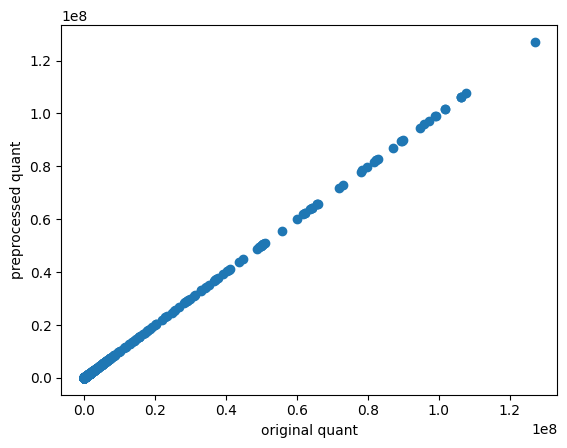

correlation between both processings: 0.9999999999999999


In [ ]:

#hide
import yaml
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def compare_generic_table_with_original(preprocessed_input_df, original_spectronaut_file, config_yaml,input_typename_config, sep = "\t"):
    id2quant_orig, id2quant_preproc = get_processed_original_id2quant_maps(preprocessed_input_df, original_spectronaut_file, config_yaml,input_typename_config)
    keys_orig = set(id2quant_orig.keys())
    keys_preproc = set(id2quant_preproc.keys())
    print(keys_orig)
    print(keys_preproc)
    keydiff = keys_orig.difference(keys_preproc)
    keys_orig = sorted(keys_orig)
    keys_preproc = sorted(keys_preproc)
    
    
    assert(len(keydiff)==0) #check that all keys in the preprocessed set are part of the original set

    assert set(id2quant_orig.keys()) == set(id2quant_preproc.keys())
    
    quantvec_orig = np.array([id2quant_orig.get(x)for x in id2quant_preproc.keys()])
    quantvec_preproc = np.array([id2quant_preproc.get(x)for x in id2quant_preproc.keys()])
    plt.show()
    plt.scatter(quantvec_orig, quantvec_preproc)
    plt.xlabel("original quant")
    plt.ylabel("preprocessed quant")
    plt.show()
    corrcoeff = np.corrcoef(quantvec_orig,quantvec_preproc)[0][1]
    print(f"correlation between both processings: {corrcoeff}")
    assert(corrcoeff>0.999)



def get_processed_original_id2quant_maps(preprocessed_input_df, original_spectronaut_file, config_yaml,input_typename_config, sep = "\t"):
    config_all = yaml.safe_load(open(config_yaml, 'r'))
    config_dict = config_all.get(input_typename_config)
    id_cols = config_dict.get("ion_cols") + [config_dict.get("sample_ID")]
    quant_col = list(config_dict.get("quant_ID").values())
    id2quant_orig = get_id2quant_original(original_spectronaut_file, id_cols, quant_col, sep)
    id2quant_preproc = get_id2quant_processed(preprocessed_input_df)

    return id2quant_orig, id2quant_preproc


def get_id2quant_original(original_spectronaut_file, id_cols, quant_col, sep):
    orig_df = pd.read_csv(original_spectronaut_file, sep=sep, usecols= id_cols+quant_col)
    orig_df["compareID"] = orig_df.apply(lambda row : "".join(row[id_cols].astype('string')), axis = 1)
    id2quant = dict(zip(orig_df["compareID"], orig_df[quant_col[0]]))
    id2quant = {k: round(v,3) for k, v in id2quant.items()}
    return id2quant


def get_id2quant_processed(preprocessed_input_df):
    quant_cols = [x for x in preprocessed_input_df.columns if x.endswith(".raw")]
    melted_preproc_df = preprocessed_input_df.melt(id_vars = ["MOD", "CHARGE"], value_vars = quant_cols).dropna()
    melted_preproc_df["compareID"] = melted_preproc_df["MOD"].astype('string') + melted_preproc_df["CHARGE"].astype('string') + melted_preproc_df["variable"].astype('string')
    melted_preproc_df["compareID"] = melted_preproc_df["compareID"].str.replace("MOD_", "").str.replace("CHARGE_", "")
    id2quant_preproc = dict(zip(melted_preproc_df["compareID"], melted_preproc_df["value"]))
    return id2quant_preproc


def load_and_format_input_data(input_file, input_type_to_use):
    input_df = quant_reader_manager.import_data(input_file, input_type_to_use=input_type_to_use)
    input_df = input_df.set_index('quant_id')
    input_df["CHARGE"] = input_df["CHARGE"].astype('string')
    #get all column names with numerical values
    numerical_cols = input_df.select_dtypes(include=['number']).columns
    input_df = input_df.replace(0, np.nan)
    #input_df[numerical_cols] = np.log2(input_df[numerical_cols].replace(0, np.nan))
    return input_df



input_df = load_and_format_input_data(SPECTRONAUT_FILE, "spectronaut_precursor_v2")
display(input_df)
compare_generic_table_with_original(input_df, SPECTRONAUT_FILE, "../../alphabase/constants/const_files/quant_reader_config.yaml", "spectronaut_precursor_v2")



In [ ]:
import glob
import os

# Define the directory to search in

# Find all files with "aq_reformat.tsv" at the end
files_to_delete = glob.glob(os.path.join(TEST_FILE_DIR, "*aq_reformat.tsv"))

# Delete the files
for file in files_to_delete:
    os.remove(file)
    print(f"Deleted: {file}")
    

Deleted: ../../test_data/unit_tests/input_table_formats/mq_peptides.txt.maxquant_peptides_leading_razor_protein.aq_reformat.tsv
Deleted: ../../test_data/unit_tests/input_table_formats/fragpipe.tsv.fragpipe_precursors.aq_reformat.tsv
Deleted: ../../test_data/unit_tests/input_table_formats/spectronaut.tsv.spectronaut_precursor_v2.aq_reformat.tsv
Deleted: ../../test_data/unit_tests/input_table_formats/diann_test_input_mDIA.tsv.diann_fragion_isotopes_mDIA_raw.aq_reformat.tsv
Deleted: ../../test_data/unit_tests/input_table_formats/spectronaut_frgion.tsv.spectronaut_fragion_isotopes.aq_reformat.tsv
Deleted: ../../test_data/unit_tests/input_table_formats/spectronaut.frgions.large.tsv.spectronaut_precursor_v2.aq_reformat.tsv
Deleted: ../../test_data/unit_tests/input_table_formats/diann.tsv.diann_fragion_isotopes.aq_reformat.tsv
